In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df_all = pd.read_csv('C://Users//snuist//Data//LoanStats_2016Q1_small.csv')

In [5]:
df_part = df_all[['loan_amnt', 'annual_inc']]

In [6]:
df_part_np = df_part.as_matrix()

loan = df_part_np[:, 0]
income = df_part_np[:, 1]

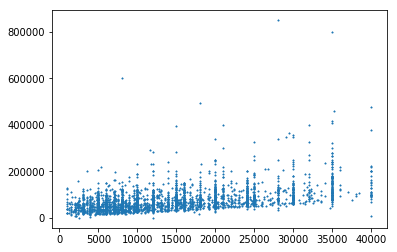

In [7]:
plt.scatter(loan, income, marker = '*', s=1.5)
plt.show()

In [8]:
mdl_0124 = linear_model.LinearRegression()
mdl_0124.fit(np.reshape(loan, (3000, 1)), np.reshape(income, (3000, 1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
a_hat = mdl_0124.intercept_
b_hat = mdl_0124.coef_

print(a_hat)
print(b_hat)

[ 35711.2750324]
[[ 2.71341741]]


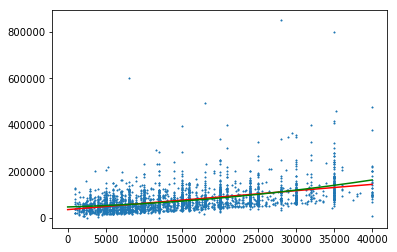

In [66]:
X_plot = np.linspace(0, 40000, 10**4)
y_plot = a_hat + X_plot*b_hat
y_plot = y_plot.ravel() # To make 1d-array

fig2 = plt.figure()
plt.scatter(loan, income, marker = '*', s=1.5)
plt.plot(X_plot, y_plot, color='red')

## For the HW 1 ##

mdl_hw = linear_model.LinearRegression()
loan_re = np.reshape(loan, (3000, 1))
income_re = np.reshape(income, (3000, 1)) 
# Reshaped np-arrays. Check their dimensions, 
# and compare them with the original loan and income

X_hw = np.concatenate((loan_re, (loan_re**2)), axis = 1)
# A matrix that contains both loan and loan^2.

mdl_hw.fit(X_hw, income_re)

a_hw = mdl_hw.intercept_
b_hw = mdl_hw.coef_ # Estimated coefficients

y_plot_hw = a_hw + ((X_plot**2) * b_hw[0, 1]) + (X_plot * b_hw[0, 0])
plt.plot(X_plot, y_plot_hw, color='green')

plt.show()